<h1><center>Khám phá và tiền xử lý dữ liệu</center></h1>

<hr>

### 1. Các thư viện sử dụng


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### 2. Khám phá và tiền xử lý dữ liệu

- Trong phần này, nhóm sẽ khám phá các đặc trưng của dữ liệu. Trước hết, nhóm đọc dữ liệu từ `./Data/survey_results_public_2021.csv`, `./Data/survey_results_public_2022.csv`, `./Data/survey_results_public_2023.csv` - là dữ liệu của cuộc khảo sát vào năm 2021, 2022, 2023

In [3]:
df_2021 = pd.read_csv('./Data/survey_results_public_2021.csv')
df_2022 = pd.read_csv('./Data/survey_results_public_2022.csv')
df_2023 = pd.read_csv('./Data/survey_results_public_2023.csv')

- Vì nhóm muốn tạo một bộ dữ liệu được kết hợp từ 3 bộ dữ liệu trên, nên trước hết, nhóm sẽ xem qua thông tin của 3 bộ dữ liệu

In [4]:
print("Kích thước của bộ dữ liệu năm 2021: ",df_2021.shape)
print("Kích thước của bộ dữ liệu năm 2022: ",df_2022.shape)
print("Kích thước của bộ dữ liệu năm 2022: ",df_2023.shape)

Kích thước của bộ dữ liệu năm 2021:  (83439, 48)
Kích thước của bộ dữ liệu năm 2022:  (73268, 79)
Kích thước của bộ dữ liệu năm 2022:  (89184, 84)


- Có thể thấy, số lượng cột của 3 bộ dữ liệu là khác nhau, ta hãy xem các cột của từng bộ dữ liệu

In [5]:
print("Cột ngẫu nhiên lấy ra từ dữ liệu 2021: ",df_2021.columns)
print("-------------------------------------------------------------------------------")
print("Cột ngẫu nhiên lấy ra từ dữ liệu 2022: ",df_2022.columns)
print("-------------------------------------------------------------------------------")
print("Cột ngẫu nhiên lấy ra từ dữ liệu 2022: ",df_2023.columns)


Cột ngẫu nhiên lấy ra từ dữ liệu 2021:  Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')
--------------

- Các cột chung là: 

In [6]:
common_columns_21_22 = df_2021.columns.intersection(df_2022.columns)
common_columns_all = common_columns_21_22.intersection(df_2023.columns)
common_columns_all

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'EdLevel',
       'LearnCode', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'NEWSOSites', 'SOVisitFreq',
       'SOAccount', 'SOPartFreq', 'SOComm', 'Age', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

- Nhóm tạo 1 bộ dữ liệu, được lấy từ việc giao các trường của 3 năm lại với nhau, với việc thêm vào trường `Year` để thuận tiện cho việc xử lý, đồng thời, nhóm cũng bỏ cột RespondID 

In [7]:
df_2021['Year'] = 2021
df_2022['Year'] = 2022
df_2023['Year'] = 2023


df_new = pd.concat([df_2021[list(common_columns_all)+['Year']], df_2022[list(common_columns_all)+['Year']], df_2023[list(common_columns_all)+['Year']]], ignore_index=True)
df_new.drop()
# df_new.head(5)

#### 2.0. Dữ liệu có bao nhiêu dòng và cột

In [8]:
df_new.shape

(245891, 36)

- Dữ liệu có 245891 dòng và 36 cột

#### 2.1. Khám phá các dòng

- Mỗi dòng là câu trả lời khảo sát của một người tham gia. Mọi người tiến hành tham gia khảo sát trực tiếp trên nền tảng Stack Overflow. Theo tìm hiểu của nhóm, Stack Overflow sử dụng nền tảng Survey Monkey cho việc tạo và quản lý các cuộc khảo sát

- Số dòng trùng

In [10]:
df_new.duplicated().sum()

0

- Không có dòng nào bị trùng trong bộ dữ liệu

#### 2.2. Khám phá các cột

- Kiểu dữ liệu từng cột

In [11]:
df_new.dtypes

ResponseId                        int64
MainBranch                       object
Employment                       object
Country                          object
EdLevel                          object
LearnCode                        object
YearsCode                        object
YearsCodePro                     object
DevType                          object
OrgSize                          object
Currency                         object
CompTotal                       float64
LanguageHaveWorkedWith           object
LanguageWantToWorkWith           object
DatabaseHaveWorkedWith           object
DatabaseWantToWorkWith           object
PlatformHaveWorkedWith           object
PlatformWantToWorkWith           object
WebframeHaveWorkedWith           object
WebframeWantToWorkWith           object
MiscTechHaveWorkedWith           object
MiscTechWantToWorkWith           object
ToolsTechHaveWorkedWith          object
ToolsTechWantToWorkWith          object
NEWCollabToolsHaveWorkedWith     object


- Tìm hiểu về các cột có kiểu dữ liệu là object

In [12]:
def open_object_dtype(s):
    dtypes = set()
    dtypes.update(s.apply(type))
    return dtypes

df_new[df_new.dtypes.index[df_new.dtypes == object]].apply(open_object_dtype)

MainBranch                                       {<class 'str'>}
Employment                      {<class 'float'>, <class 'str'>}
Country                         {<class 'float'>, <class 'str'>}
EdLevel                         {<class 'float'>, <class 'str'>}
LearnCode                       {<class 'float'>, <class 'str'>}
YearsCode                       {<class 'float'>, <class 'str'>}
YearsCodePro                    {<class 'float'>, <class 'str'>}
DevType                         {<class 'float'>, <class 'str'>}
OrgSize                         {<class 'float'>, <class 'str'>}
Currency                        {<class 'float'>, <class 'str'>}
LanguageHaveWorkedWith          {<class 'float'>, <class 'str'>}
LanguageWantToWorkWith          {<class 'float'>, <class 'str'>}
DatabaseHaveWorkedWith          {<class 'float'>, <class 'str'>}
DatabaseWantToWorkWith          {<class 'float'>, <class 'str'>}
PlatformHaveWorkedWith          {<class 'float'>, <class 'str'>}
PlatformWantToWorkWith   

- Tìm các cột có dạng multiple choice

In [14]:
def is_multiple(column):
    return column.str.contains(';').any()

df_new[df_new.dtypes.index[df_new.dtypes == object]].apply(is_multiple)

MainBranch                      False
Employment                       True
Country                         False
EdLevel                         False
LearnCode                        True
YearsCode                       False
YearsCodePro                    False
DevType                          True
OrgSize                         False
Currency                        False
LanguageHaveWorkedWith           True
LanguageWantToWorkWith           True
DatabaseHaveWorkedWith           True
DatabaseWantToWorkWith           True
PlatformHaveWorkedWith           True
PlatformWantToWorkWith           True
WebframeHaveWorkedWith           True
WebframeWantToWorkWith           True
MiscTechHaveWorkedWith           True
MiscTechWantToWorkWith           True
ToolsTechHaveWorkedWith          True
ToolsTechWantToWorkWith          True
NEWCollabToolsHaveWorkedWith     True
NEWCollabToolsWantToWorkWith     True
NEWSOSites                       True
SOVisitFreq                     False
SOAccount   

- Có thể thấy, với các cột numerical, kiểu dữ liệu là float hoặc int đúng như dự tính
- Với các cột có kiểu dữ liệu Object, do trong bộ dữ liệu có NA (người tham gia không trả lời), nên đa số sẽ có 2 kiểu con là float và str. Tuy vậy, với các cột Employment, LearnCode, DevType, LanguageHaveWorkedWith, LanguageWantToWorkWith, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, PlatformHaveWorkedWith, PlatformWantToWorkWith, WebframeHaveWorkedWith, WebframeWantToWorkWith, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWSOSites là dạng multiple choice, vì vậy tùy theo mục đích mà có cách xử lý dữ liệu khác nhau 

#### 2.3. Xóa các cột không có ý nghĩa

- Sau khi hợp nhất 3 bộ dữ liệu, có một số cột mất đi ý nghĩa của nó: cụ thể là cột `ResponseId`, cột `CompTotal` (do các năm 2021, 2022, người tham gia được chọn tính theo tuần/tháng/năm, nhưng năm 2023 thì chỉ được tính theo n) 

In [15]:
df_new=df_new.drop(['ResponseId','CompTotal'],axis=1)

#### 2.4. Phân bố dữ liệu ở các cột

##### Các cột kiểu số
- Với các cột kiểu số: ta có 2 cột , ConvertedCompYearly và Year. Ta sẽ xem sự phân bố của giá trị, cũng như tính max, min và phần trăm mất mát. Do cột year là cột được thêm vào, ta chỉ xem sự phân bổ để xem số lượng dữ liệu mỗi năm 

In [17]:
num_cols = [ "ConvertedCompYearly", "Year"]

missing_percentages = np.sum(df_new[num_cols].isna(), axis=0) / df_new.shape[0] * 100
mins = df_new[num_cols].quantile(0, numeric_only=False)
maxs = df_new[num_cols].quantile(1, numeric_only=False)


mins = mins.astype(float)
maxs = maxs.astype(float)
# Create DataFrame
info = pd.DataFrame({"Missing percentage": missing_percentages, "Min": mins, "Max": maxs})


info = info.transpose()

print(info)

                    ConvertedCompYearly    Year
Missing percentage         4.593783e+01     0.0
Min                        1.000000e+00  2021.0
Max                        7.435143e+07  2023.0


- Có thể thấy, thu nhập theo năm có hiệu giữa max và min khá lớn, vì vậy việc vẽ biểu đồ là khá khó, ở đây, em sẽ phân tích xem có bao nhiêu dữ liệu ứng với từng bin 25,50,75,199 và vẽ biểu đồ histogram dạng log-scale

In [21]:
bins = [df_new["ConvertedCompYearly"].quantile(0), df_new["ConvertedCompYearly"].quantile(0.25),df_new["ConvertedCompYearly"].quantile(0.5),df_new["ConvertedCompYearly"].quantile(0.75), df_new["ConvertedCompYearly"].quantile(1)]
# Sử dụng pd.cut để tạo các bin
binned_data = pd.cut(df_new['ConvertedCompYearly'], bins=bins, include_lowest=True)


bin_counts = binned_data.value_counts()
print(bin_counts)
# print(df_new["ConvertedCompYearly"].isna().sum()/df_new["ConvertedCompYearly"].shape[0])


ConvertedCompYearly
(0.999, 35028.0]          33254
(114115.0, 74351432.0]    33234
(66130.0, 114115.0]       33232
(35028.0, 66130.0]        33214
Name: count, dtype: int64


- Ta thấy được dữ liệu được trải vào các bin khá đều, tiếp theo, ta sẽ xem qua biểu đồ log scale histogram

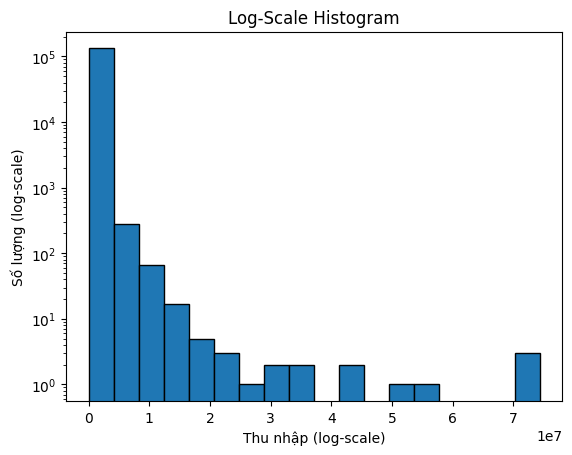

In [20]:
bin_size=int(1+np.log2(df_new.shape[0]))
plt.hist(df_new["ConvertedCompYearly"], bins=bin_size, edgecolor='black', log=True)

# Thêm tiêu đề và nhãn trục
plt.title('Log-Scale Histogram')
plt.xlabel('Thu nhập (log-scale)')
plt.ylabel('Số lượng (log-scale)')

# Hiển thị biểu đồ
plt.show()

- Như vậy, ta thấy được đa số có mức lương từ 0 dến 1x10^7, Các mức khác có số lượng ít (khoảng 10 người)

<h1><center>Đặt câu hỏi và trả lời</center></h1>